In [1]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.manifold import TSNE

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [5]:
# load data
df = pd.read_csv('HepatitisCdata.csv')

# menampilkan data
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [6]:
# melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [7]:
# melihat statistika deskriptif data
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


** PREPROCESSING DATA**

In [8]:
df.describe(include=object)

,Category,Sex
count,615,615
unique,5,2
top,0=Blood Donor,m
freq,533,377


In [9]:
# cek missing values data
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [10]:

# menampilkan jumlah missing values dalam setiap variabel
print("Jumlah Missing Values Sebelum Imputasi:")
print(df[['ALP', 'ALB', 'CHOL', 'PROT', 'ALT']].isnull().sum())

# imputasi missing values dengan mean
df= df.fillna(df.mean())

# menampilkan jumlah missing values setelah imputasi
print("\nJumlah Missing Values Setelah Imputasi:")
print(df[['ALP', 'ALB', 'CHOL', 'PROT', 'ALT']].isnull().sum())


Jumlah Missing Values Sebelum Imputasi:
ALP     18
ALB      1
CHOL    10
PROT     1
ALT      1
dtype: int64

Jumlah Missing Values Setelah Imputasi:
ALP     0
ALB     0
CHOL    0
PROT    0
ALT     0
dtype: int64


<AxesSubplot:xlabel='Age', ylabel='Density'>

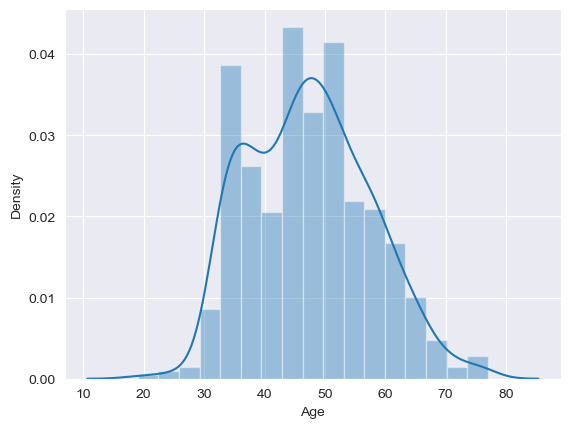

In [ ]:
sns.distplot(df['Age'])

**Visualisasi**

In [ ]:
df["Sex"].value_counts()

m    377
f    238
Name: Sex, dtype: int64

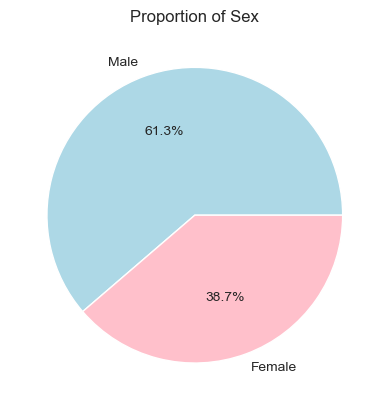

In [ ]:
count = [377,238]
labels = "Male", "Female"
plt.pie(count,
        labels = labels,
        autopct = "%1.1f%%",
        colors = ["Lightblue", "Pink"])
plt.title("Proportion of Sex")
plt.show()

Text(0, 0.5, 'Frequency')

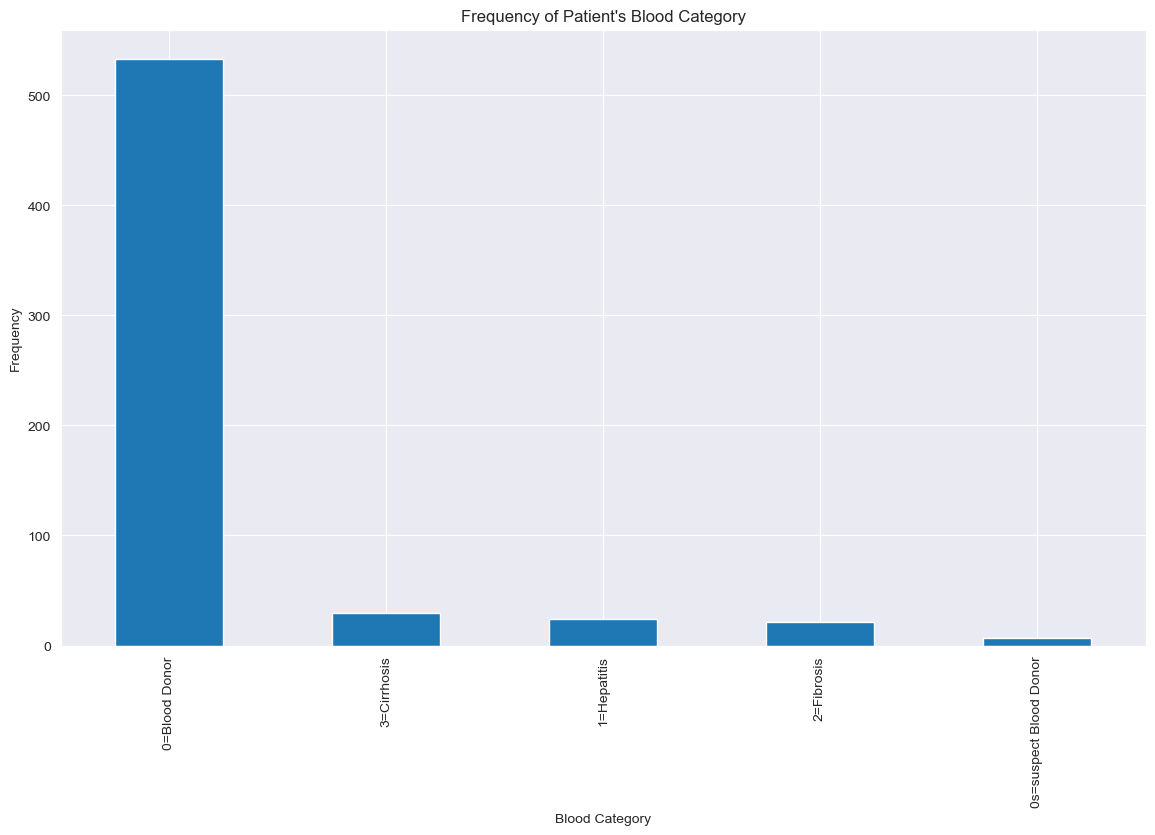

In [ ]:
bar1 = df['Category'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Frequency of Patient's Blood Category")
bar1.set_xlabel("Blood Category")
bar1.set_ylabel("Frequency")

In [11]:
dff=df.drop(['Sex','Unnamed: 0','Age'],axis=1)

In [ ]:
dff

,Category,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [12]:
df1 = dff.replace("3=Cirrhosis", 1)

In [13]:
df2 = df1.replace("1=Hepatitis", 1)

In [14]:
df3 = df2.replace("2=Fibrosis", 1)

In [15]:
df4 = df3.replace("0=Blood Donor",0)

In [16]:
df5 = df4.replace("0s=suspect Blood Donor",2)

Text(0, 0.5, 'Frequency')

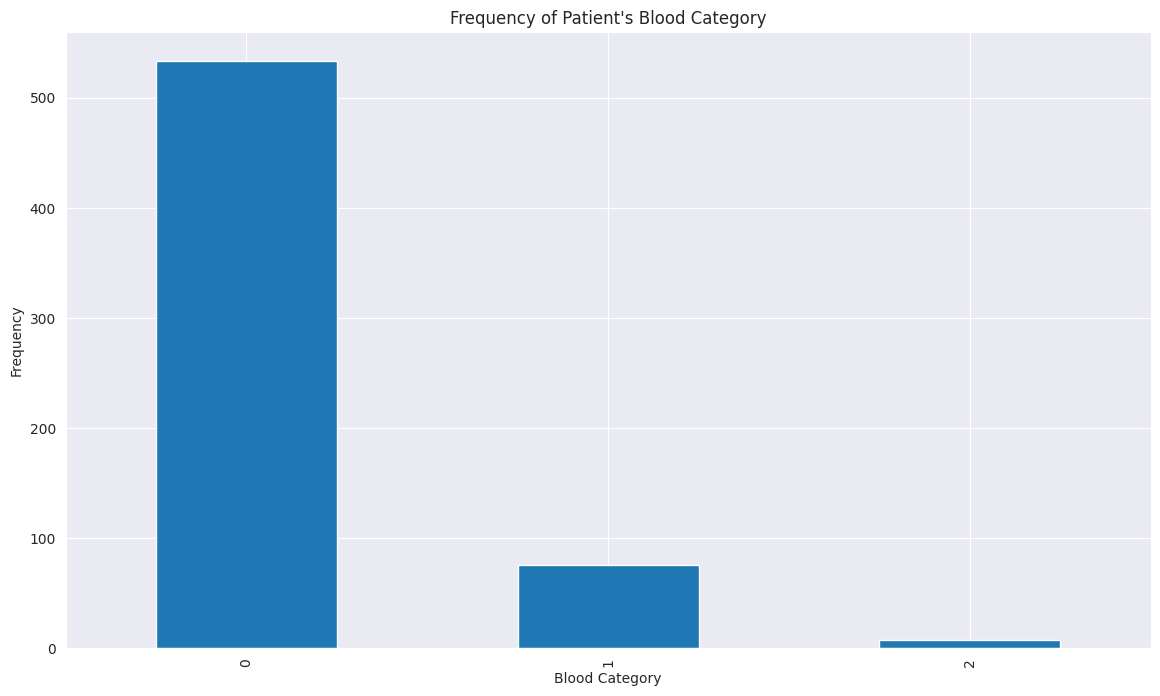

In [17]:
bar2 = df5['Category'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Frequency of Patient's Blood Category")
bar2.set_xlabel("Blood Category")
bar2.set_ylabel("Frequency")

In [21]:
print(df5.columns.tolist())

['Category', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [22]:
jumlah_per_kategori = df5['Category'].value_counts()
jumlah_per_kategori

0    533
1     75
2      7
Name: Category, dtype: int64

# VISUALISASI DATA

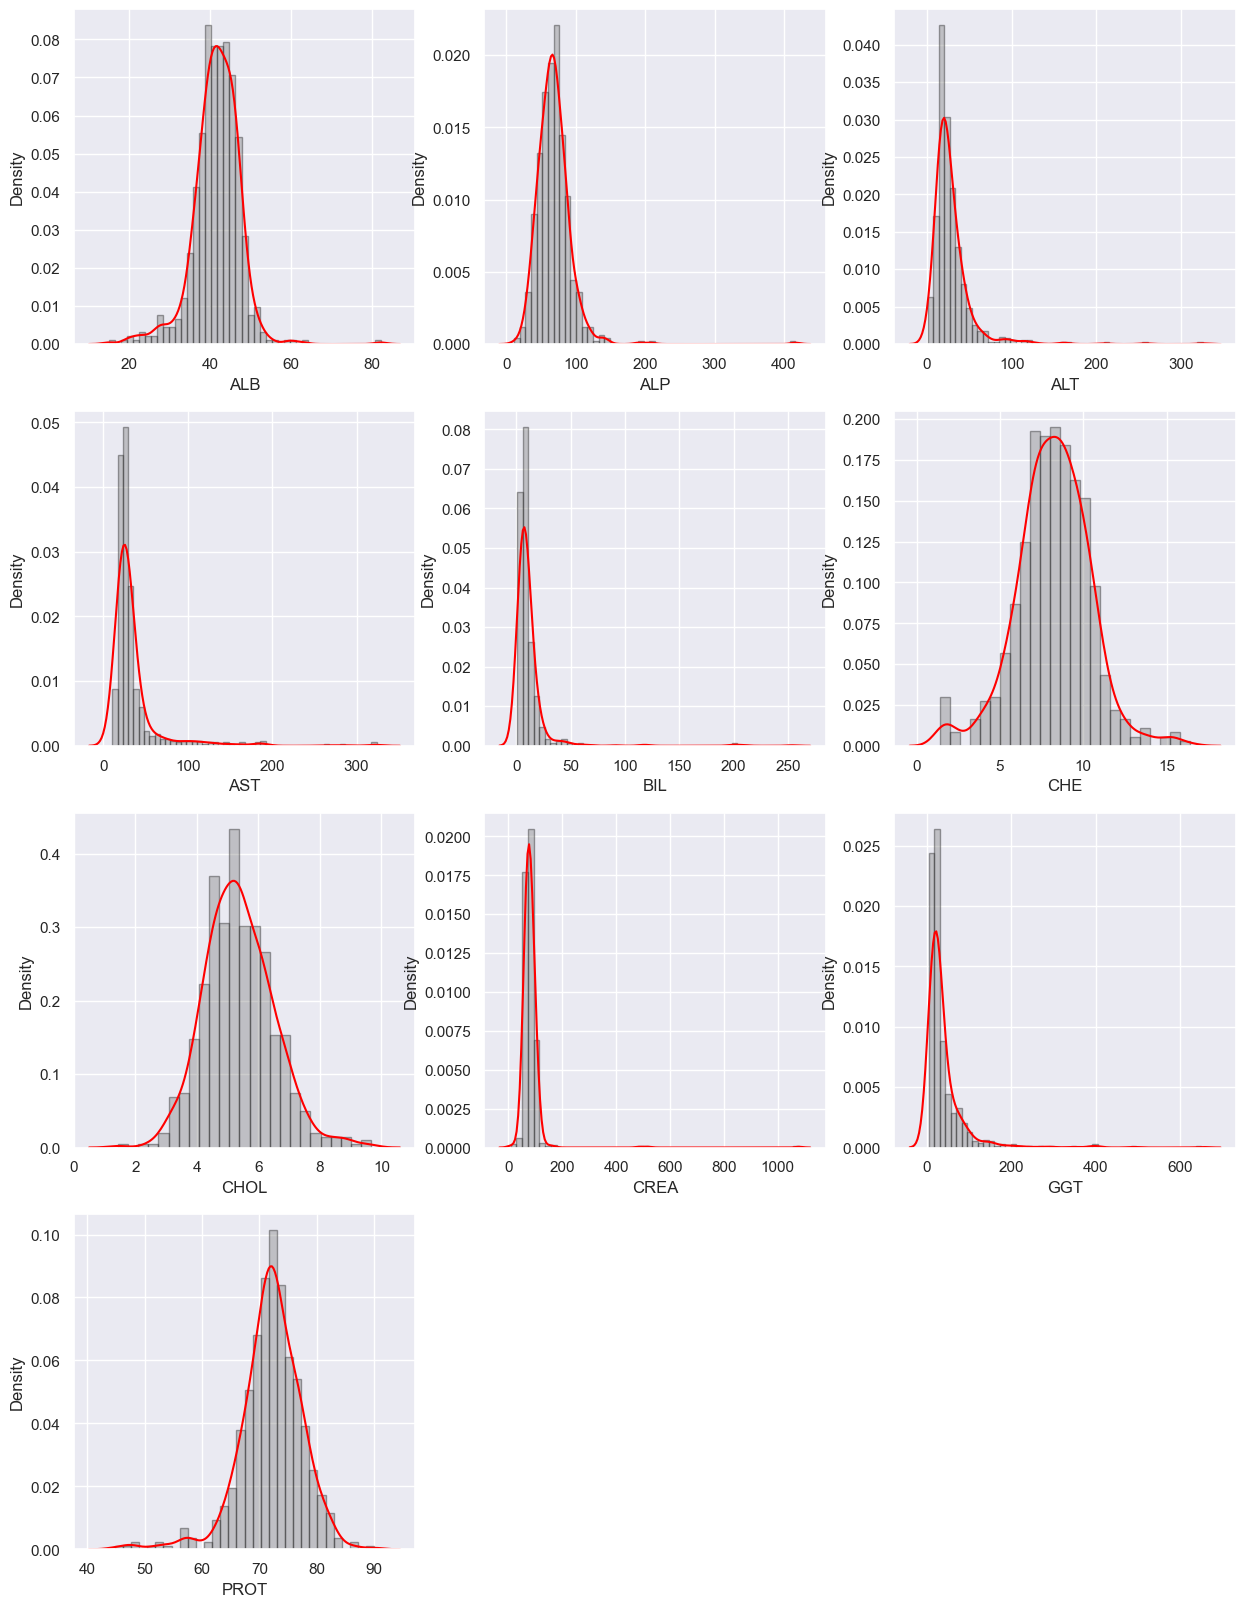

In [ ]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.distplot(df5[col],hist_kws=dict(edgecolor="k", linewidth=1,color='grey'),color='red')
    cnt+=1
plt.show()

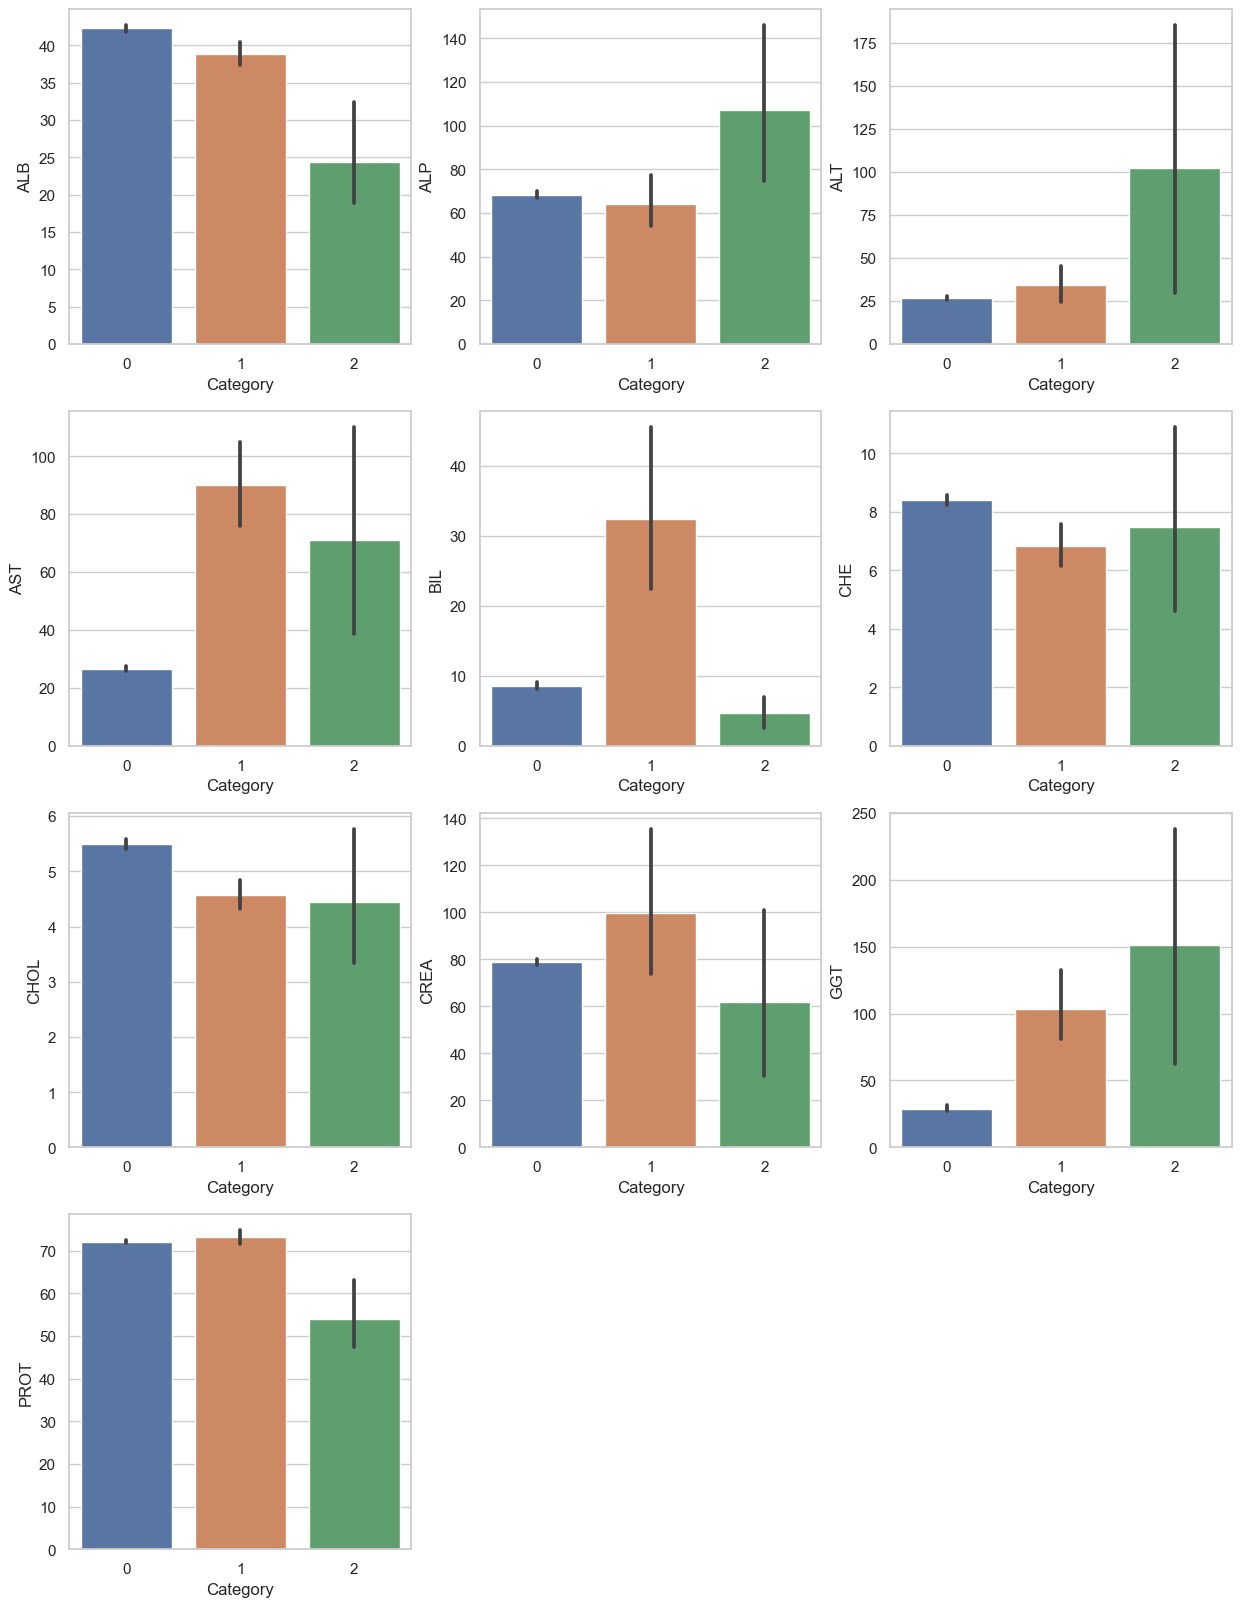

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.barplot(data = df5, x = 'Category', y = col)
    cnt+=1
plt.show()

Dari barchart diatas dapat dilihat hubungan antara tiap variabel dengan frekuensi dari Blood Category yaitu Health untuk 0, Hepatitis untuk 1 dan suspect untuk 2. Contohnya pada variabel ALB, orang yang sehat (0) memiliki kadar albumin yang cenderung tinggi. Sementara orang yang hepatitis (1) memiliki kadar albumin yang lebih rendah dari orang yang sehat. dst.

In [23]:
df5

,Category,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...
610,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [25]:
data = df.loc[0:615,["Age","Sex"]]

In [ ]:
data1 = data.join(df5)

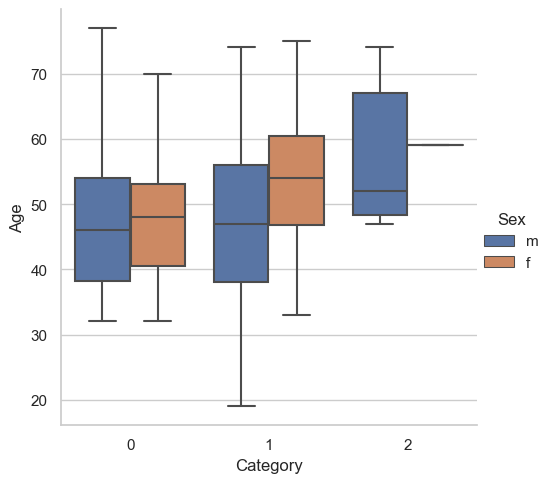

In [ ]:
sns.catplot(data = data1, x = 'Category', y = 'Age', kind = 'box', hue = 'Sex')
plt.show()

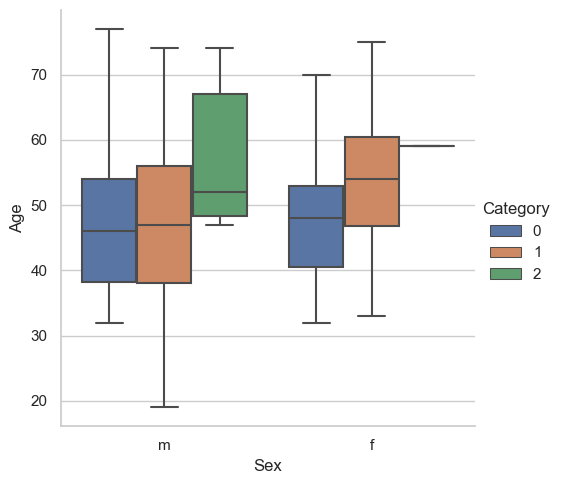

In [ ]:
sns.catplot(data = data1, x = 'Sex', y = 'Age', kind = 'box', hue = 'Category')
plt.show()

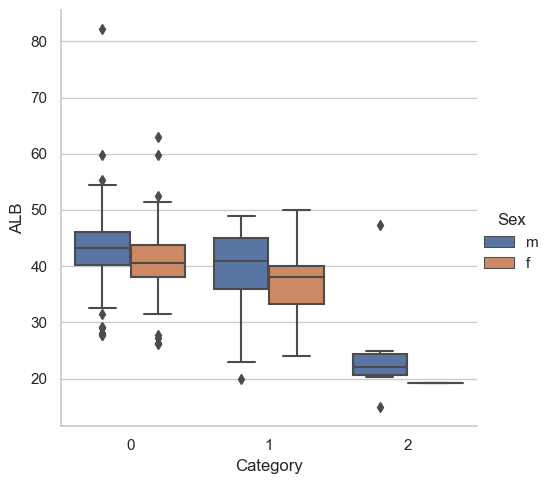

In [ ]:
sns.catplot(data = data1, x = 'Category', y = 'ALB', kind = 'box', hue = 'Sex')
plt.show()

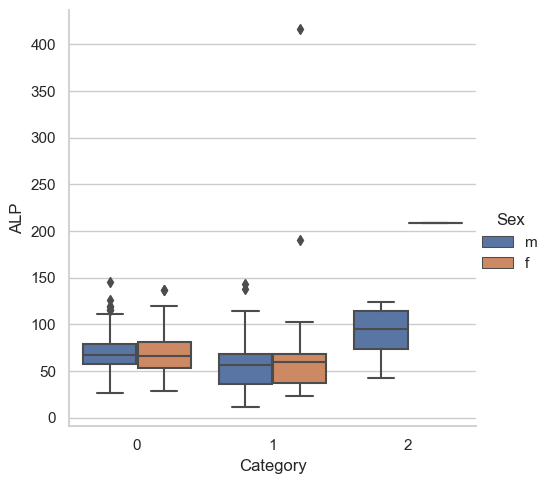

In [ ]:
sns.catplot(data = data1, x = 'Category', y = 'ALP', kind = 'box', hue = 'Sex')
plt.show()

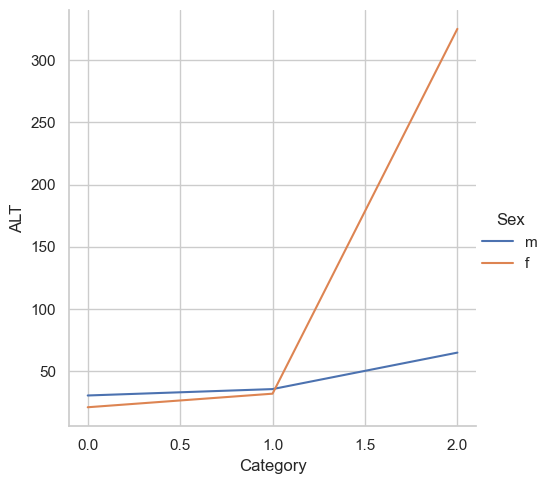

In [ ]:
sns.relplot(data = data1, x = 'Category', y =  'ALT', kind = 'line', hue = 'Sex', ci = None)
plt.show()

In [27]:
df5.corr()

,Category,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000000,-0.331187,0.038102,0.248117,0.596600,0.320305,-0.216619,-0.275496,0.093503,0.496068,-0.128114
ALB,-0.331187,1.000000,-0.138858,0.001606,-0.193397,-0.221650,0.375848,0.204803,-0.001573,-0.155555,0.550033
ALP,0.038102,-0.138858,1.000000,0.172461,0.062202,0.048600,0.032971,0.121914,0.149554,0.442262,-0.053633
ALT,0.248117,0.001606,0.172461,1.000000,0.273325,-0.038468,0.146953,0.068023,-0.043025,0.248086,0.094373
AST,0.596600,-0.193397,0.062202,0.273325,1.000000,0.312231,-0.208536,-0.207507,-0.021387,0.491263,0.039888
BIL,0.320305,-0.221650,0.048600,-0.038468,0.312231,1.000000,-0.333172,-0.156261,0.031224,0.217024,-0.041309
CHE,-0.216619,0.375848,0.032971,0.146953,-0.208536,-0.333172,1.000000,0.420163,-0.011157,-0.110345,0.293184
CHOL,-0.275496,0.204803,0.121914,0.068023,-0.207507,-0.156261,0.420163,1.000000,-0.047667,-0.006828,0.206546
CREA,0.093503,-0.001573,0.149554,-0.043025,-0.021387,0.031224,-0.011157,-0.047667,1.000000,0.121003,-0.031693
GGT,0.496068,-0.155555,0.442262,0.248086,0.491263,0.217024,-0.110345,-0.006828,0.121003,1.000000,-0.011735


<Axes: >

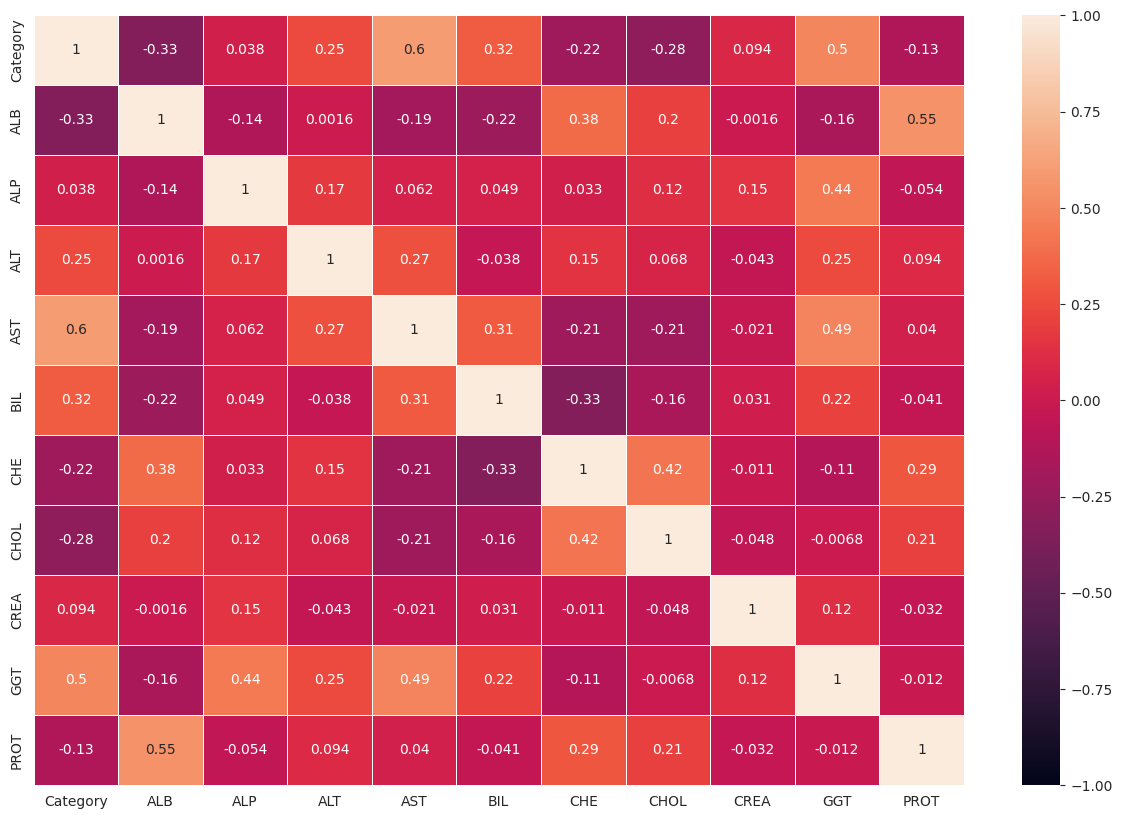

In [26]:
# Plot the Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df5.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

In [ ]:
df5.describe()

,Category,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.144715,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,0.383113,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398234
min,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,0.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,0.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,2.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
df5

,Category,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...
610,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


# PREPARE DATA UNTUK OVERSAMPLING

In [28]:
design_matrix = df5.drop("Category", axis = 1)
response_y = df5["Category"]

In [29]:
design_matrix

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...
610,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [30]:
response_y

0      0
1      0
2      0
3      0
4      0
      ..
610    1
611    1
612    1
613    1
614    1
Name: Category, Length: 615, dtype: int64

In [31]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='not majority')


In [32]:
design_matrix, response_y = undersample.fit_resample(design_matrix, response_y)

In [ ]:
print(Counter(response_y))

Counter({0: 533, 1: 7, 2: 7})


In [33]:
X_train, X_test, y_train, y_test = train_test_split(design_matrix, response_y, test_size = 0.2, random_state = 110)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(437, 10)
(437,)
(110, 10)
(110,)


In [35]:
# Define a dictionary to store the results
results = {}

# NAIVE BAYES

In [36]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train , y_train);

In [37]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred1 = model.predict(X_test)

accuray = accuracy_score(y_pred1, y_test)
f1 = f1_score(y_pred1, y_test, average = 'weighted')

print("Accuracy :", accuray)
print("F1 Score :", f1)


Accuracy : 0.9545454545454546
F1 Score : 0.9353819889031156


# SPLIT TRAIN TEST

In [38]:
from sklearn.model_selection import train_test_split

X = df5.drop('Category', axis = 1)
y = df5['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.26, random_state = 125)
print("train sample size",X_train.shape,type(X_train))
print("test sample size",X_test.shape,type(X_test))


train sample size (455, 10) <class 'pandas.core.frame.DataFrame'>
test sample size (160, 10) <class 'pandas.core.frame.DataFrame'>


# DECISION TREE

In [39]:
#load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [46]:
# Create Decision Tree classifer object
clf=DecisionTreeClassifier()

# Train Decision Tree Classifer
clf=clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred=clf.predict(X_test)
y_pred1=clf.predict(X_train)

In [47]:
# Model Accuracy, for data train
print("Accuracy:",metrics.accuracy_score(y_train,y_pred1))

Accuracy: 1.0


In [56]:
#desicion treee  for data test
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       135
           1       0.71      0.71      0.71        21
           2       0.00      0.00      0.00         4

    accuracy                           0.91       160
   macro avg       0.55      0.56      0.56       160
weighted avg       0.89      0.91      0.90       160



In [49]:
feature_cols=list(X_train)

In [50]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


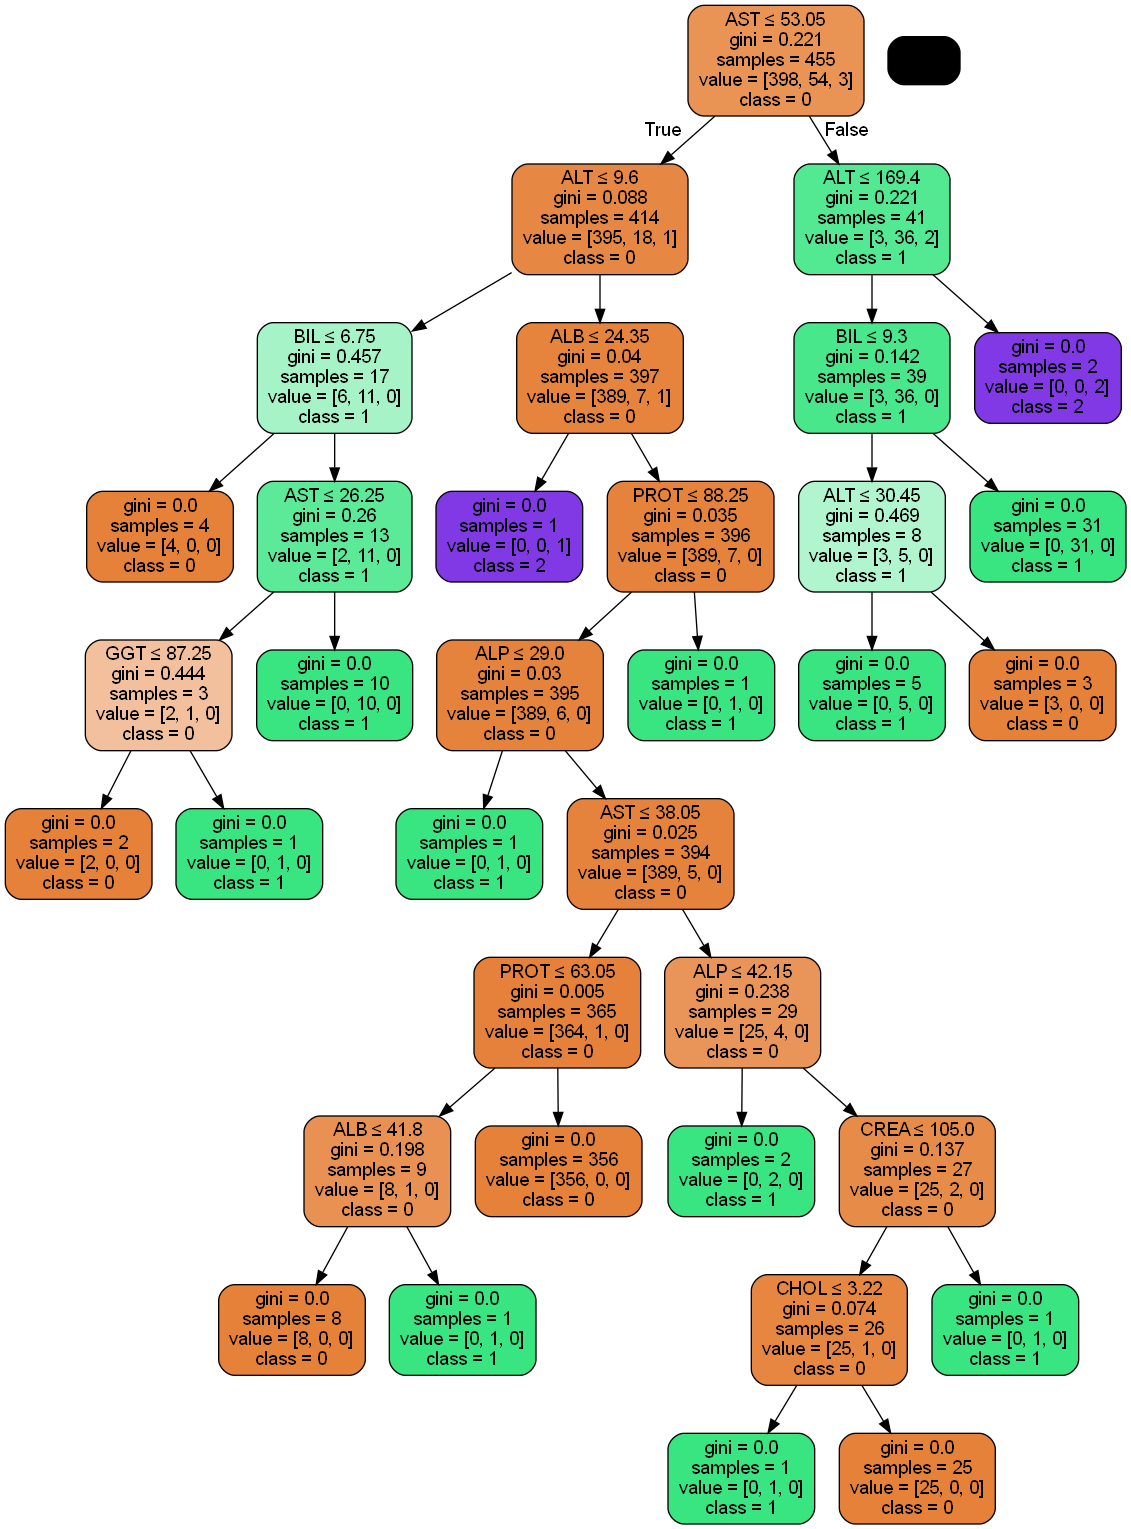

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Hepatitis.png')
Image(graph.create_png())

# CONFUSION MATRIX

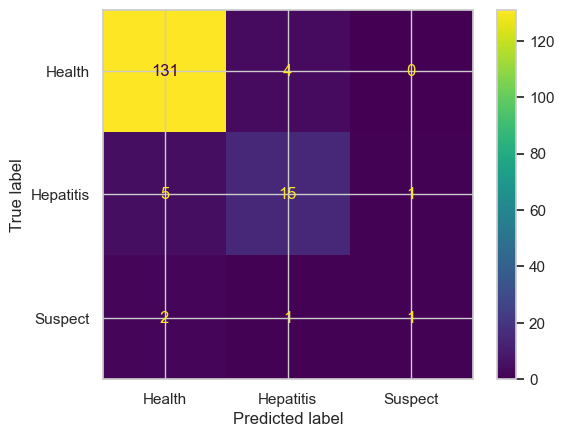

In [ ]:
labels = ['Health','Hepatitis','Suspect']
cm = confusion_matrix(y_test , y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot();

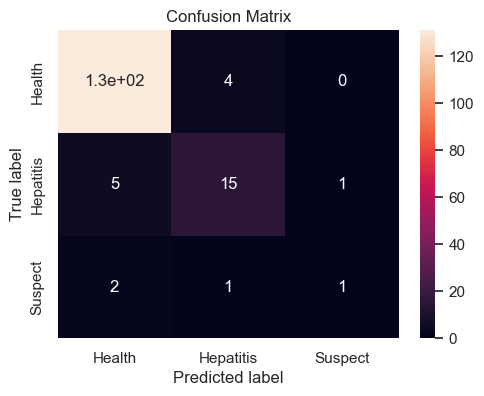

In [ ]:
#CONFUSION MATRIX YANG BAGUS
labels = ['Health','Hepatitis','Suspect']
cm = confusion_matrix(y_test , y_pred)
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Health','Hepatitis','Suspect'],
                     columns = ['Health','Hepatitis','Suspect'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
cm

array([[131,   4,   0],
       [  5,  15,   1],
       [  2,   1,   1]], dtype=int64)

# RANDOM FOREST

In [52]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
print(classification_report(y_train,rf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00         3

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [55]:
#random forest
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       135
           1       0.94      0.81      0.87        21
           2       0.00      0.00      0.00         4

    accuracy                           0.94       160
   macro avg       0.63      0.60      0.61       160
weighted avg       0.92      0.94      0.93       160

